<a href="https://colab.research.google.com/github/safaiat/CT_EXP/blob/main/pytorch_recon/TV_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

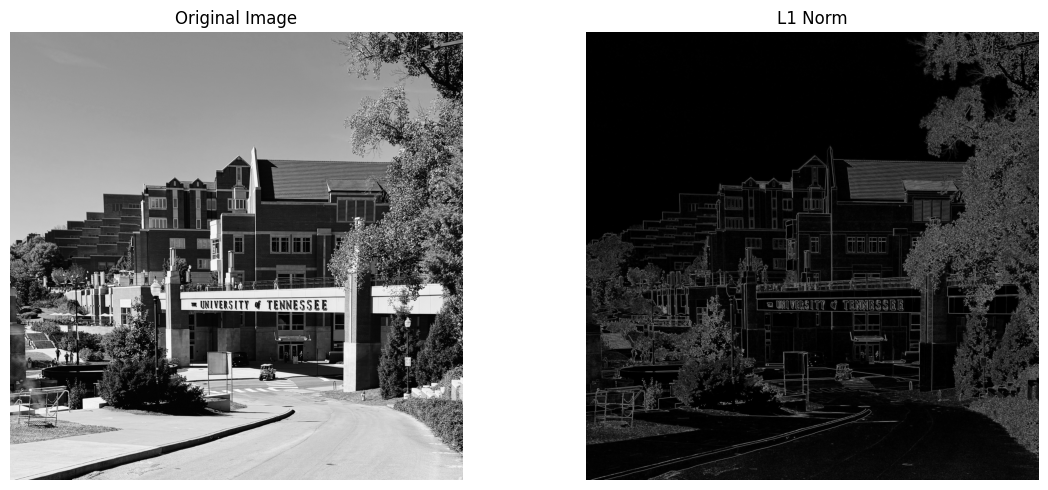

In [2]:
import cv2
import matplotlib.pyplot as plt

def L1_Norm(image):
    height, width = len(image), len(image[0])

    # Define 8-connected neighbors with weights
    neighbors = [
        (-1,  0, 1.0),              # Top
        ( 1,  0, 1.0),              # Bottom
        ( 0, -1, 1.0),              # Left
        ( 0,  1, 1.0),              # Right
        (-1, -1, 1 / (2**0.5)),     # Top-left
        (-1,  1, 1 / (2**0.5)),     # Top-right
        ( 1, -1, 1 / (2**0.5)),     # Bottom-left
        ( 1,  1, 1 / (2**0.5)),     # Bottom-right
    ]

    # create empty TV map
    tv_map = [[0.0 for _ in range(width)] for _ in range(height)]

    for i in range(height):
        for j in range(width):
            tv_value = 0.0

            for dx, dy, weight in neighbors:
                ni = i + dx #new i
                nj = j + dy #new j

                # Make sure it calculates inside the image
                if 0 <= ni < height and 0 <= nj < width:
                    diff = image[i][j] - image[int(ni)][int(nj)]
                    tv_value += weight * abs(diff)

            tv_map[i][j] = tv_value

    return tv_map

# ---- Load Image as Pure Python Grayscale List ----
image_path = '/content/IMG_0455 2.jpg'  # 🔁 Replace this
gray = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Normalize to [0, 1] manually
gray_normalized = [[pixel / 255.0 for pixel in row] for row in gray]

# ---- Compute TV Map ----
tv_map = L1_Norm(gray_normalized)

# ---- Plot the Result ----
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(gray_normalized, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(tv_map, cmap='gray')
plt.title('L1 Norm')
plt.axis('off')

plt.tight_layout()
plt.show()
